In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Resources/pnw_final.csv')

# Drop non-numeric or irrelevant columns for initial model
df_model = df.drop(columns=['time', 'updated', 'place', 'type', 'net', 'id', 'magType', 
                            'locationSource', 'magSource', 'status'])

# Drop rows with missing values
df_model = df_model.dropna()

# Separate features and target
X = df_model.drop(columns='mag')
y = df_model['mag']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.31895760952044344
R²: 0.5855989693917683


In [ ]:
#📊 Root Mean Squared Error (RMSE): 0.319
#What it means: On average, your model's earthquake magnitude predictions are off by about ±0.319 units.

#Is that good? That depends on your context. For earthquake magnitudes (which typically range between ~1.0 to 5.0+ for regional events), 
# an error under ±0.5 can be considered reasonably accurate, especially if the predictions are meant for categorization or general trend 
# analysis rather than precise forecasting.

In [ ]:
#📈 R² Score (Coefficient of Determination): 0.586
#What it means: About 58.6% of the variance in earthquake magnitude can be explained by your model’s input features.

#Is that good?

#For real-world geophysical data, this is actually decent. Earthquakes are influenced by many complex and chaotic factors 
# that might not be captured in your current dataset (e.g., tectonic stress buildup, subsurface geology, fault rupture history).

#In data science, an R² around 0.6 for noisy natural phenomena is often considered a strong baseline.

In [ ]:
#✅ Summary:
#Your model is:

#Reasonably accurate, with low average error (RMSE ≈ 0.32)

#Moderately explanatory, capturing nearly 60% of the variation in magnitude

In [6]:
importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
10,magNst,0.232880
3,nst,0.140889
9,magError,0.100040
0,latitude,0.083068
11,year,0.079151
1,longitude,0.061008
2,depth,0.049653
4,gap,0.048606
5,dmin,0.036096
6,rms,0.031840


In [ ]:
#The two most important variables are magNst and nst, which are the total number of seismic stations used to calculate the magnitude for the earthquake 
# and the total number of seismic stations used to determine earthquake location.

#These are derived from the event itself, not from underlying conditions before the event. They are measurement artifacts, not predictors of magnitude. Their values often depend on the magnitude (larger quakes are recorded by more stations), 
# making them "leaky" features — they leak outcome information into your input data.

#We should drop them because including these variables could inflate model performance unfairly. Below is the model re-trained without these two columns.

RMSE: 0.32729527633507854
R²: 0.5636506170795652

Feature Importances:
             Feature    Importance
9               year  1.941759e-01
23        magType_mw  1.480883e-01
19        magType_md  7.632934e-02
2              depth  7.244486e-02
3                gap  6.843186e-02
1          longitude  6.419491e-02
0           latitude  6.329215e-02
8           magError  4.164312e-02
5                rms  3.936686e-02
7         depthError  3.914122e-02
4               dmin  3.741098e-02
6    horizontalError  3.669288e-02
11               day  3.417301e-02
12              hour  3.091803e-02
10             month  2.514959e-02
17        magType_mb  1.243619e-02
21        magType_ml  7.568907e-03
20        magType_mh  4.180505e-03
24       magType_mwr  1.783774e-03
25       magType_mww  6.340559e-04
16        magType_ma  5.410542e-04
22        magType_ms  4.489022e-04
26  status_automatic  4.224152e-04
27   status_reviewed  4.075299e-04
13        magType_Ml  9.903576e-05
18        magType_m

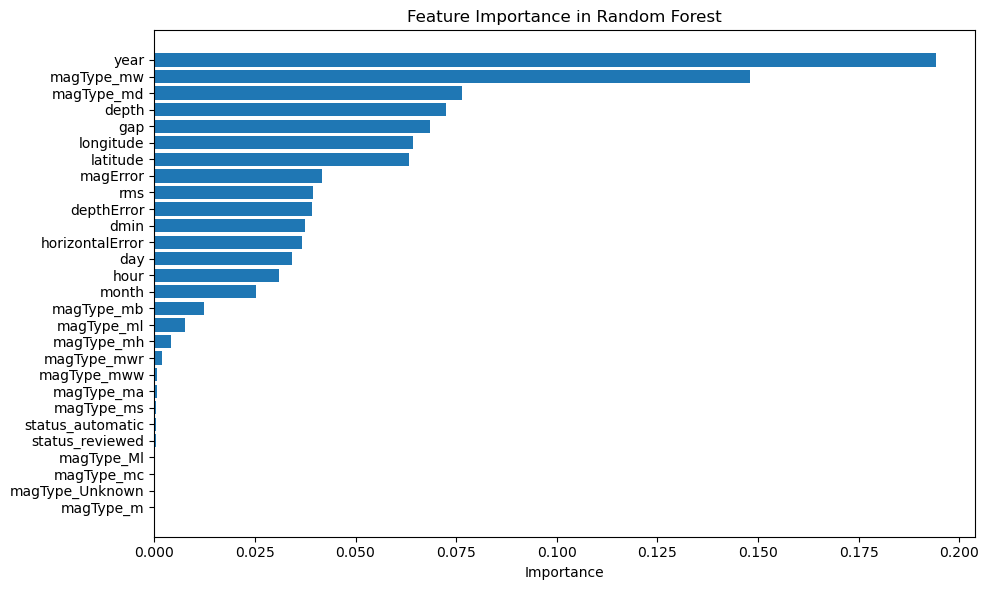

In [10]:
import matplotlib.pyplot as plt

# Load the CSV
df2 = pd.read_csv('Resources/pnw_final.csv')

# Drop non-predictive or unwanted fields
df2 = df2.drop(columns=['time', 'id', 'updated', 'place', 'type', 'net', 'locationSource', 'magSource', 'magNst', 'nst'])

# Drop any rows with null values
df2 = df2.dropna()

# One-hot encode categorical features
df2 = pd.get_dummies(df2)

# Define features (X) and target (y)
X = df2.drop(columns=['mag'])  # 'mag' is the magnitude we're predicting
y = df2['mag']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Feature importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Optional: plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

| Rank  | Feature                                  | Importance  | Interpretation                                                                                                                    |
| ----- | ---------------------------------------- | ----------- | --------------------------------------------------------------------------------------------------------------------------------- |
| 1     | `year`                                   | 0.194       | **Most predictive** — earthquake magnitude patterns may have changed over time (e.g., due to instrumentation or regional shifts). |
| 2     | `magType_mw`                             | 0.148       | Events labeled as moment magnitude (`mw`) have a strong relationship with higher or more variable magnitudes.                     |
| 3     | `magType_md`                             | 0.076       | Duration magnitude also shows notable influence.                                                                                  |
| 4–7   | `depth`, `gap`, `longitude`, `latitude`  | \~0.06–0.07 | These **location and geometry features** help explain earthquake strength.                                                        |
| 8–10  | `magError`, `rms`, `depthError`          | \~0.04      | The **error margins** in the measurement still offer signal about uncertainty in the magnitude.                                   |
| 11–14 | `dmin`, `horizontalError`, `day`, `hour` | \~0.03–0.04 | Slightly useful; maybe some mild time-of-day or distance effects.                                                                 |
| Lower | Other `magType_*` dummies                | < 0.01      | These have little to no contribution individually.                                                                                |

magType Code	Description
ml	Local magnitude (Richter scale)
md	Duration magnitude
mw	Moment magnitude
mb	Body-wave magnitude
mh	Hypocentral magnitude
mwr	Moment magnitude (regional)
mww	Moment magnitude (broadband)
mlg	Local magnitude (Lg waves)
mb_lg	Body-wave magnitude (Lg waves)

🔍 The Issue: Label Leakage from magType
In predictive modeling, label leakage (or data leakage) happens when a feature includes information that is only available after the target (label) is known. This undermines the model’s validity by making it look more accurate than it would be in real-world use.

🧠 In This Case:
You're predicting mag (magnitude), and one of your features is magType — a categorical label that describes how the magnitude was measured (e.g., ml, mw, mb, etc.).

But here’s the catch:

The magType is chosen based on the event and the data available after the quake, often after the magnitude has already been estimated.

For example: if the seismic network has full waveform data, it might use Mw (Moment Magnitude), which is typically more accurate and used for larger events. If it's a smaller quake with limited data, it might use Md (Duration Magnitude).

❗ Why It Might Be a Problem:
The model can "cheat" by learning correlations like:

"If the magType is mw, then the magnitude is probably high."

This results in overfitting to the training data and unrealistic performance on unseen data, because in a real predictive setting (e.g., during the quake), you won’t know magType yet — you’re trying to predict the magnitude!

✅ What You Can Do:
Remove magType entirely, especially if you plan to use the model in a real-time or pre-processing context.

Keep magType only if:

You’re modeling post-processed data.

Your use case assumes you already know which magnitude type was used.

If you keep it, be aware of this limitation when interpreting model performance.

In [ ]:
#Let's try again, removing the magType variable and its dummies

RMSE: 0.4133996727956282
R²: 0.3038623090755008

Feature Importances:
            Feature  Importance
7              year    0.155128
1         longitude    0.124268
2             depth    0.119623
0          latitude    0.102816
5   horizontalError    0.100174
6        depthError    0.081808
4               rms    0.081379
3              dmin    0.079332
9               day    0.057004
10             hour    0.053601
8             month    0.044866


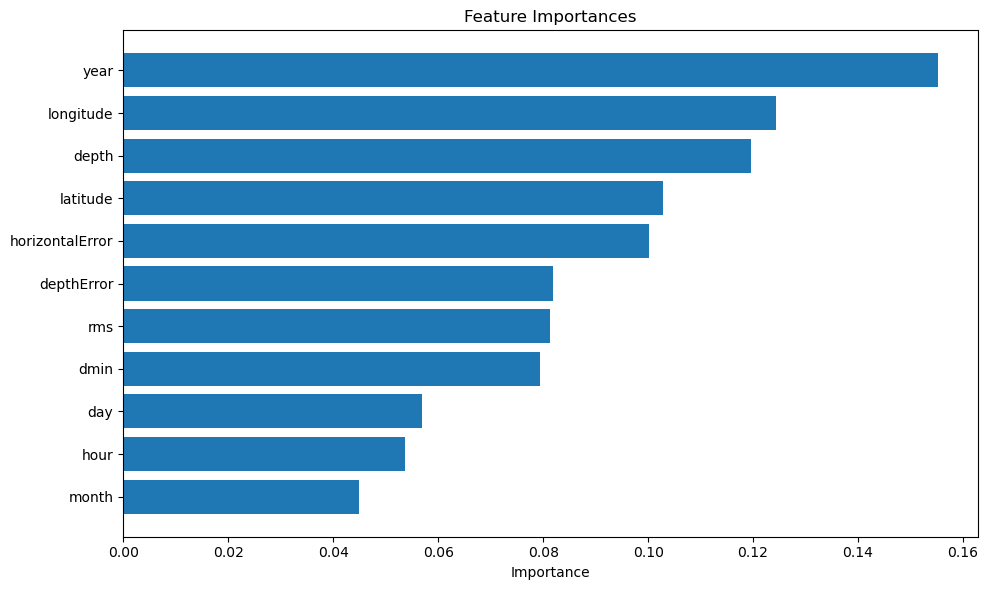

In [12]:
# Load data
df3 = pd.read_csv("Resources/pnw_final.csv")

# Drop non-numeric, non-predictive, and removed variables
df3 = df3.drop(columns=[
    'time', 'net', 'id', 'updated', 'place', 'type', 'status',
    'locationSource', 'magSource', 'magType', 'nst', 'magNst', 'magError', 'gap'  # magType, nst, magNst, magError, gap removed
])

# Drop rows with missing values
df3 = df3.dropna()

# Define features and target
X = df3.drop(columns=['mag'])  # Features
y = df3['mag']                 # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importances)

# Plot importances
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

📉 Model Performance
RMSE = 0.413
On average, your model’s predicted magnitudes are off by about 0.41 units. For earthquake magnitudes, which usually range from ~2.5 to ~6 in this dataset, that’s a moderate error.

R² = 0.304
The model explains only 30.4% of the variance in earthquake magnitudes. That’s relatively low, indicating the predictors aren't strongly correlated with the outcome.

📊 Feature Importances (Top Contributors)
Feature	Explanation
year (15.5%)	Temporal trend: maybe seismic activity intensity varies by year.
longitude, latitude (12–10%)	Location is relevant—some areas are more seismically active.
depth (11.9%)	Depth of earthquake correlates with strength.
horizontalError, depthError (~8–10%)	How precise the coordinates/depth are—still affecting predictions.
rms, dmin (~8%)	Signal strength & station distance: some link to magnitude.
day, hour, month (4–5%)	Very weak correlation to time of day/month.

🧠 Conclusion
You're now using only pre-event and geospatial features, which makes this model realistically predictive—but at the cost of performance:

✔️ It's a valid predictive model without data leakage.

⚠️ However, the current features don't strongly predict magnitude, which aligns with the real-world challenge of forecasting earthquake severity.

In [ ]:
#Let's try linear regression

RMSE: 0.5023784011264755
R²: -0.028056089951410845

Feature Coefficients:
            Feature  Coefficient
4               rms     0.139451
3              dmin     0.055172
5   horizontalError    -0.013014
1         longitude    -0.012990
8             month    -0.007727
7              year    -0.006540
6        depthError     0.002355
0          latitude     0.001089
2             depth    -0.000394
10             hour     0.000343
9               day    -0.000261


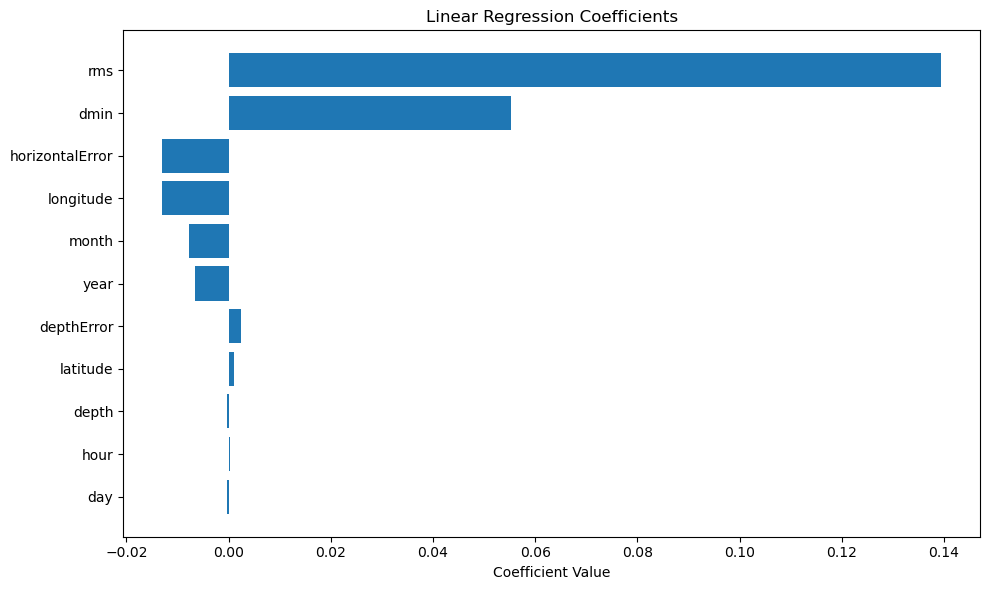

In [15]:
from sklearn.linear_model import LinearRegression

# Load data
df4 = pd.read_csv("Resources/pnw_final.csv")

# Drop non-numeric, non-predictive, and removed variables
df4 = df4.drop(columns=[
    'time', 'net', 'id', 'updated', 'place', 'type', 'status',
    'locationSource', 'magSource', 'magType', 'nst', 'magNst', 'magError', 'gap'
])

# Drop missing values
df4 = df4.dropna()

# Define features and target
X = df4.drop(columns=['mag'])
y = df4['mag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

🔍 Key Metrics
RMSE: 0.502

The Root Mean Squared Error indicates the average magnitude of prediction error. On average, your model’s predictions are off by ~0.5 magnitude units.

Lower RMSE is better. This is worse than your earlier Random Forest model, which had an RMSE of ~0.36–0.41.

R²: -0.028

This is negative, which means your model performs worse than just predicting the mean magnitude every time.

A negative R² is a strong sign that linear regression is not capturing the relationship in your data well.

📊 Coefficient Interpretation
Each coefficient tells you how much the predicted magnitude changes for a one-unit increase in that feature, assuming all other features are held constant:

Feature	Coefficient	Meaning
rms	+0.139	A 1-unit increase in RMS (root mean square of residuals) is associated with a +0.14 increase in predicted magnitude. Most influential in this model.
dmin	+0.055	Greater distance to the nearest station is weakly associated with higher magnitude.
horizontalError	-0.013	More horizontal error is slightly associated with lower predicted magnitude.
longitude	-0.013	Slight westward longitude movement correlates with slightly lower magnitude.
month, year	Very small	Almost negligible influence in this linear model.

Note: Coefficients near zero suggest weak or no linear relationship.

⚠️ Bottom Line
Linear regression is not well-suited for this dataset — your features and target likely have non-linear interactions.

The negative R² confirms that this model does not generalize well.

Random Forest did much better, indicating that nonlinear models are more appropriate here.

In [ ]:
#Last, let's try a neural net and then move on to classification

RMSE: 0.4420940592415617
R²: 0.20386952370315958


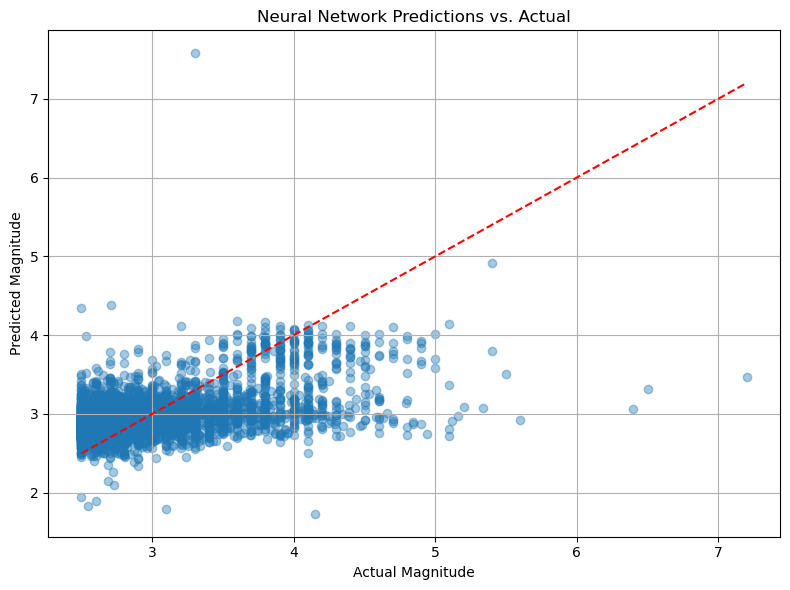

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Load and clean DataFrame
df5 = pd.read_csv("Resources/pnw_final.csv")

# Drop non-numeric, non-predictive, and removed variables
df5 = df5.drop(columns=[
    'time', 'net', 'id', 'updated', 'place', 'type', 'status',
    'locationSource', 'magSource', 'magType', 'nst', 'magNst', 'magError', 'gap'
])

# Drop rows with missing values
df5 = df5.dropna()

# Define features and target
X = df5.drop(columns=['mag'])
y = df5['mag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train neural network
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Neural Network Predictions vs. Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

🔢 Evaluation Metrics
RMSE (Root Mean Squared Error): 0.442

This means your neural network's average prediction error is about 0.44 magnitude units, which is decent for regression depending on your use case.

Smaller is better.

R² (R-squared): 0.204

This tells you how much of the variability in earthquake magnitudes your model explains.

20% of the variance in the actual magnitude is explained by your input features.

Not great, but not unexpected with complex natural phenomena like earthquakes.

📊 Interpreting the Scatter Plot
The red dashed line is the perfect prediction line (i.e., y = x).

Most points are clustered below the line, especially for higher magnitudes.

This suggests underprediction for larger quakes.

The model struggles with higher magnitudes, likely due to:

Fewer high-magnitude samples (imbalanced data),

Lack of strong predictive features for extreme events.